量子ソフトウェア勉強会第13回目:「量子インスパイアード古典アルゴリズム」ハンズオン資料 4
2022年10月7日(金)  
高比良宗一
$$
\newcommand{\norm}[1]{\lVert#1\rVert}
\renewcommand{\top}{\mathsf{T}}
\newcommand{\SQ}{\mathrm{SQ}}
$$

# 2クラス問題に対する量子インスパイアード古典アルゴリズム
このノートブックでは，2クラス問題について考察します．具体的にはIRISデータセットを例にして，線形識別関数の係数ベクトル$\theta$に関する$\SQ(\theta)$を考察します．そして，テスト用のデータがどちらのクラスであるかどうか，$\theta$をそのまま構成することなく，判別することについて考えます．

In [1]:
import numpy as np
import scipy as sp
import numpy.linalg as la
import random
import cmath, math
import matplotlib.pyplot as plt
import pprint
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

## データセットを読み込む

IRISデータセットはPythonのライブラリ[scikit-learn](https://scikit-learn.org/stable/)に含まれています．
このライブラリにある`load_iris`を使うことで読み込むことができます．次のセルでデータをロードしてみます．

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
pprint.pprint(iris)

{'DESCR': '.. _iris_dataset:\n'
          '\n'
          'Iris plants dataset\n'
          '--------------------\n'
          '\n'
          '**Data Set Characteristics:**\n'
          '\n'
          '    :Number of Instances: 150 (50 in each of three classes)\n'
          '    :Number of Attributes: 4 numeric, predictive attributes and the '
          'class\n'
          '    :Attribute Information:\n'
          '        - sepal length in cm\n'
          '        - sepal width in cm\n'
          '        - petal length in cm\n'
          '        - petal width in cm\n'
          '        - class:\n'
          '                - Iris-Setosa\n'
          '                - Iris-Versicolour\n'
          '                - Iris-Virginica\n'
          '                \n'
          '    :Summary Statistics:\n'
          '\n'
          '    ============== ==== ==== ======= ===== ====================\n'
          '                    Min  Max   Mean    SD   Class Correlation\n'
          '  

## 分類問題

scikit-learnに含まれている`train_test_split`を使うと，データを訓練用とテスト用の配列に分割することができます．

In [3]:
from sklearn.model_selection import train_test_split

iris = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data[50:], iris.target[50:], random_state=1)
print("訓練用データ\n", x_train)
print("訓練用ラベル\n", y_train)
print("テスト用データ\n", x_test)
print("テスト用ラベル\n", y_test)

訓練用データ
 [[6.  3.4 4.5 1.6]
 [6.7 3.3 5.7 2.5]
 [6.7 3.  5.  1.7]
 [5.7 2.9 4.2 1.3]
 [5.6 3.  4.1 1.3]
 [7.7 3.8 6.7 2.2]
 [5.9 3.  5.1 1.8]
 [6.5 3.  5.8 2.2]
 [6.7 3.  5.2 2.3]
 [6.  3.  4.8 1.8]
 [5.5 2.6 4.4 1.2]
 [5.1 2.5 3.  1.1]
 [7.2 3.6 6.1 2.5]
 [6.1 2.8 4.7 1.2]
 [5.4 3.  4.5 1.5]
 [6.3 3.4 5.6 2.4]
 [6.3 2.9 5.6 1.8]
 [6.1 3.  4.9 1.8]
 [6.7 3.1 4.4 1.4]
 [6.3 2.8 5.1 1.5]
 [6.1 3.  4.6 1.4]
 [5.7 3.  4.2 1.2]
 [6.9 3.1 5.1 2.3]
 [6.8 2.8 4.8 1.4]
 [6.2 3.4 5.4 2.3]
 [5.  2.3 3.3 1. ]
 [7.6 3.  6.6 2.1]
 [6.4 2.9 4.3 1.3]
 [6.5 2.8 4.6 1.5]
 [6.7 2.5 5.8 1.8]
 [5.7 2.8 4.1 1.3]
 [6.1 2.8 4.  1.3]
 [6.4 3.1 5.5 1.8]
 [5.5 2.3 4.  1.3]
 [6.7 3.3 5.7 2.1]
 [5.5 2.4 3.8 1.1]
 [6.5 3.  5.5 1.8]
 [6.9 3.2 5.7 2.3]
 [5.8 2.6 4.  1.2]
 [6.2 2.9 4.3 1.3]
 [6.9 3.1 5.4 2.1]
 [6.6 2.9 4.6 1.3]
 [6.5 3.2 5.1 2. ]
 [7.  3.2 4.7 1.4]
 [6.7 3.1 5.6 2.4]
 [7.3 2.9 6.3 1.8]
 [6.3 2.5 4.9 1.5]
 [6.4 2.7 5.3 1.9]
 [5.7 2.5 5.  2. ]
 [4.9 2.4 3.3 1. ]
 [6.3 2.5 5.  1.9]
 [6.1 2.9 4.7 1.4]
 [7.

今回は`sepal length`(がく片の長さ)と`petal length`(花びらの長さ)から，versicolorか，virginicaのどちらであるか判断することを考えます．IRISデータセットの50行目以降がversicolor及びvirginicaのデータで，`sepal length`, `petal length`が0列目,2列目であることを踏まえると，行列$A$, $b$は次のセルのように定義できます．

In [4]:
from sklearn.datasets import load_iris

# IRISデータセットを読み込み，versicolorとvirginicaに分ける．
iris = load_iris()

x_train, x_test, y_train, y_test = train_test_split(iris.data[50:], iris.target[50:] , random_state=1)
size = len(x_train)

# Aとbを定義する．
A = np.zeros((size, 3))
A[:,0] = np.ones(size)
A[:,1] = x_train[:,0]
A[:,2] = x_train[:,2]
# A = A/np.linalg.norm(A)
b   = np.array([1 if t==1 else -1  for t in y_train])

### 擬似逆行列

分類する直線に関するパラメータ$\theta$は，$\theta = A^+ b$のようにして求めることができます．この$\theta$によって，分類する直線は，$\theta_0 + \theta_1 x + \theta_2 y = 0$のようにして表されます．

In [5]:
exact_theta = np.linalg.pinv(A) @ b # or np.linalg.lstsq(A, b)[0]
exact_theta

array([ 2.64301213,  0.66176535, -1.37653241])

### 量子インスパイアード古典アルゴリズム

$\SQ(A)$を構成し，`3_SQ(x).ipynb`でまとめた`SQx`を用いて，$\mathrm{SQ}(\theta)$を定義します．

In [6]:
from quantum_inspired import MatrixBasedDataStructure, SQx
SQA = MatrixBasedDataStructure(A)
r, c = 1000, 1000
sq_theta = SQx(SQA, b, r, c, 2, 1000)

$\mathrm{SQ}(\theta)$の$\mathrm{Query}(i)$を用いて$\tilde{\theta}$を構成してみます．

In [7]:
m, n = A.shape
tilde_theta = np.zeros(n)
for i in range(n):
    tilde_theta[i] = sq_theta.query(i)
tilde_theta

array([-0.00031439, -0.00089496,  0.0011135 ])

### 図を描画する

上記で求めたNumPyによる解$\theta$と，量子インスパイアード古典アルゴリズムによる近似解$\tilde{\theta}$について，
直線を引いてみて，その様子を見てみます．

In [20]:
def line(theta, x):
    return -(theta[0] + theta[1]*x)/theta[2]

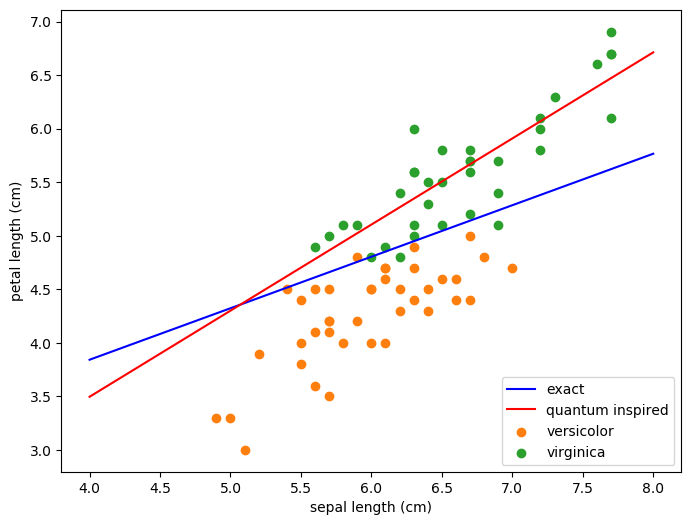

In [9]:
plt.figure(figsize=(8,6))

# 点を描画する
class1_xs, class1_ys = [], []
class2_xs, class2_ys = [], []
for xt, yt in zip(x_train, y_train):
    if yt == 1:
        class1_xs.append(xt[0])
        class1_ys.append(xt[2])
    else:
        class2_xs.append(xt[0])
        class2_ys.append(xt[2])

plt.scatter(class1_xs, class1_ys, label=iris.target_names[1], color='tab:orange')
plt.scatter(class2_xs, class2_ys, label=iris.target_names[2], color='tab:green')

# 直線を描画する
xs         = np.linspace(4,8)
line_exact = [line(exact_theta, x) for x in xs] # NumPy
line_qi    = [line(tilde_theta, x) for x in xs] # 量子インスパイアード

plt.plot(xs, line_exact, color='blue', label="exact")
plt.plot(xs, line_qi   , color='red',  label="quantum inspired")

# その他
plt.legend(loc='lower right')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.show()

### サンプリング回数を増やした時の様子

In [10]:
from quantum_inspired import MatrixBasedDataStructure, SQx
SQA = MatrixBasedDataStructure(A)
sq_theta100  = SQx(SQA, b, 100, 100, 2, 100)
sq_theta200  = SQx(SQA, b, 200, 200, 2, 200)
sq_theta400  = SQx(SQA, b, 400, 400, 2, 400)
sq_theta800  = SQx(SQA, b, 800, 800, 2, 800)
sq_theta1600 = SQx(SQA, b, 1600, 1600, 2, 1600)

In [11]:
tilde_theta100  = np.array([sq_theta100.query(i) for i in range(n)])
tilde_theta200  = np.array([sq_theta200.query(i) for i in range(n)])
tilde_theta400  = np.array([sq_theta400.query(i) for i in range(n)])
tilde_theta800  = np.array([sq_theta800.query(i) for i in range(n)])
tilde_theta1600 = np.array([sq_theta1600.query(i) for i in range(n)])

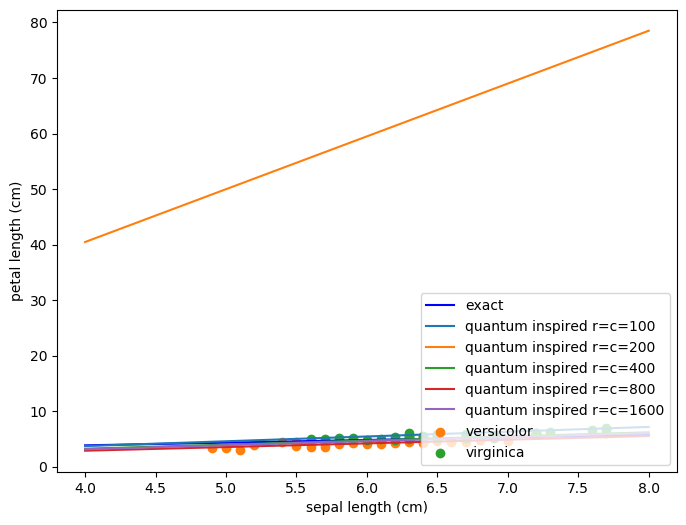

In [12]:
plt.figure(figsize=(8,6))

# 点を描画する
class1_xs, class1_ys = [], []
class2_xs, class2_ys = [], []
for xt, yt in zip(x_train, y_train):
    if yt == 1:
        class1_xs.append(xt[0])
        class1_ys.append(xt[2])
    else:
        class2_xs.append(xt[0])
        class2_ys.append(xt[2])

plt.scatter(class1_xs, class1_ys, label=iris.target_names[1], color='tab:orange')
plt.scatter(class2_xs, class2_ys, label=iris.target_names[2], color='tab:green')

# 直線を描画する
xs         = np.linspace(4,8)
line_exact = [line(exact_theta, x) for x in xs]       # NumPy

# 量子インスパイアード
line_qi100 = [line(tilde_theta100, x) for x in xs] 
line_qi200 = [line(tilde_theta200, x) for x in xs] 
line_qi400 = [line(tilde_theta400, x) for x in xs] 
line_qi800 = [line(tilde_theta800, x) for x in xs] 
line_qi1600 = [line(tilde_theta1600, x) for x in xs] 

plt.plot(xs, line_exact,  color='blue', label="exact")
plt.plot(xs, line_qi100,  label="quantum inspired r=c=100")
plt.plot(xs, line_qi200,  label="quantum inspired r=c=200")
plt.plot(xs, line_qi400,  label="quantum inspired r=c=400")
plt.plot(xs, line_qi800,  label="quantum inspired r=c=800")
plt.plot(xs, line_qi1600, label="quantum inspired r=c=1600")

# その他
plt.legend(loc='lower right')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.show()

## 予測

新しいデータ$(x, y)$が来たときに，どちらのクラス(versicolor(`1`)かvirginica(`2`))に属するかどうかは，$f(x,y) = \theta_0 + \theta_1 x + \theta_2 y =  (\theta_0,\theta_1,\theta_2)^\top (1, x, y)$の正負によって決定します．

In [13]:
from sklearn.metrics import accuracy_score

def f(theta, x, y):
    fx = np.vdot(theta, np.array([1, x, y]))
    if fx > 0:
        return 1
    else:
        return 2

テスト用データに対する予測値を計算します．

In [14]:
prediction = []
for xt in x_test:
    c = f(exact_theta, xt[0], xt[2])
    prediction.append(c)
prediction

[2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1]

上記の`prediction`が`y_test`と同様であるか確認してみます．

In [15]:
y_test

array([2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2,
       2, 2, 1])

正解率を計算してみます．

In [16]:
accuracy_score(y_test, prediction)

0.92

次に量子インスパイアード古典アルゴリズムについて考察します．
内積をそのまま計算すると，行列のサイズ分だけ計算量を必要とします．
そこで，内積の推定を用いて，$f(x,y)$の値を推定し，その推定値に基づいて，どちらのクラスであるか識別します：

In [17]:
def qi_vdot(SQa, Qb, sample_size=100):
    val = 0
    for _ in range(sample_size):
        i  = SQa.sample()
        zi = Qb[i]/SQa.query(i)
        val += zi
    return val/sample_size * SQa.norm()**2

def qi_f(SQtheta, x, y, sample_size=100):
    fx = qi_vdot(SQtheta, np.array([1, x, y]), sample_size)
    if fx > 0:
        return 1
    else:
        return 2
    
xt = x_test[0]
v = np.array([1, xt[0], xt[2]])
qi_vdot(sq_theta, v, 10)

-0.0

テスト用データに対する予測値を計算します．(実行に数分かかります)

In [18]:
sq_theta = SQx(SQA, b, 100, 100, 2, 100)

prediction_qi = []
for xt in x_test:
    c = qi_f(sq_theta, xt[0], xt[2], 10)
    prediction_qi.append(c)
prediction_qi

[2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

正解率を計算してみます．

In [19]:
accuracy_score(y_test, prediction_qi)

0.56

## 参考文献

- András Gilyén, Seth Lloyd, and Ewin Tang, ''Quantum-inspired low-rank stochastic regression with logarithmic dependence on the dimension,'' arXiv:1811.04909, (2018). https://arxiv.org/abs/1811.04909
- Ewin Tang. 2019. A quantum-inspired classical algorithm for recommendation systems. In Proceedings of the 51st Annual ACM SIGACT Symposium on Theory of Computing (STOC 2019). Association for Computing Machinery, New York, NY, USA, 217–228. https://doi.org/10.1145/3313276.3316310

- 平井有三, 「はじめてのパターン認識」, 森北出版, (2012)